In [1]:
import sys
dir_str = ".."
if (dir_str not in sys.path):
    sys.path.append(dir_str)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from supervised_learning import GradientBoostingRegressor
from utils import train_test_split, mean_squared_error

Training: 100% [-----------------------------------------------] Time:  0:00:19


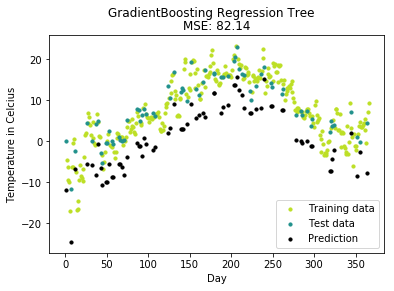

In [2]:
#load temperature data
data = pd.read_csv('../data/TempLinkoping2016.txt', sep="\t")
time = np.array(data["time"].values)
temp = np.array(data["temp"].values)

X = time.reshape(-1, 1)
X = np.insert(X, 0, values=1, axis=1)#insert bias term
y = temp#one dim

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_line = model.predict(X)

#color map
cmap = plt.get_cmap('viridis')
mse = mean_squared_error(y_test, y_pred)

#Plot the results
m1 = plt.scatter(366 * X_train[:, 1], y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(366 * X_test[:, 1], y_test, color=cmap(0.5), s=10)
m3 = plt.scatter(366 * X_test[:, 1], y_pred, color='black', s=10)
plt.suptitle("GradientBoosting Regression Tree")
plt.title("MSE: %.2f" % mse)
plt.xlabel('Day')
plt.ylabel('Temperature in Celcius')
plt.legend((m1, m2, m3), ("Training data", "Test data", "Prediction"), loc='lower right')
plt.show()